<span style="font-size:36px;"><b>Minecraft Mob Analysis</b></span>

<span style="font-size:25px;"><b>Intro:</b></span>
When did we stop being creative? That motivation and joy of making something entirely from nothing? Minecraft was the first game I ever played, and it captured that feeling perfectly: limitless possibilities and the only boundaries were your imagination. After taking BEE2041, I've discovered that coding evokes a similar experience.
This project combines data science and my passion for Minecraft. First I extracted tables from Minecraft Wiki using web scraping, concentrating on the in-game entities. I gathered information on mob damage and mob drops. My objective is to visualize and clean the combined scraped material. Additionally, use methods like random forests and linear regression to model trends in mob behavior. All the necessary steps are listed in the readme file.


<span style="font-size:25px;"><b>Data overview:</b></span>
The CSV files extracted the following mob characteristics:
• Category: Passive (e.g., cows), Neutral (e.g., Endermen), or Hostile (e.g., Creepers).
• Status effects: Does the mob apply effects like Poison or Wither?
• Affected by looting enchantment: Does the looting enchantment increase drop rates? 
• Damage on hard difficulty: Measured in HP, ranging from 2HP to 12HP × 6.
• Experience Points (EXP): Ranging from 0 to 5 points.
• Difficulty: A numerical representation of difficulty level (Easy, Normal, Hard).
Overall, the table presents a glimpse of Minecraft's mob information.


<span style="font-size:25px;"><b>Methodology:</b></span>
Below is the justification for the tools used:
• Selenium: used for web scraping Minecraft Wiki tables (e.g., mob drops, damage). Selenium was used because the Wiki’s JavaScript tables required dynamic page interaction.
• Pandas: used for combining and cleaning data. Its DataFrame structure made it easier to handle different mob data (such as numeric "Damage" and categorical "Category") and allowed for effective filtering and joining.
• Seaborn/Matplotlib: chosen for visualization for damage distribution, scatter plots for damage vs. EXP.
• Scikit-learn: utilized for predictive modeling as this analysis is observational. Most mob behaviors are fixed by Minecraft’s game design. Features like Difficulty Hard predict EXP without implying causation. I selected random forests and decision trees for their ability to predictably describe intricate relationships in observational data.


In [22]:
from IPython.display import Audio
import os

Audio("/Users/Jay/Desktop/chickenlava.mp3")

<span style="font-size:25px;"><b>Analysis:</b></span>
From here, I am going to find trends in combat risk, drop value, and mob behavior. Graph 1&2 analyzes mob drops. Graph 3&4 analyzes mob damage. After removing unmatched items, the remaining graphs shows an analysis of an inner join of 54 mobs. Let’s break down the findings:

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/3229825156.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", ax=ax1)


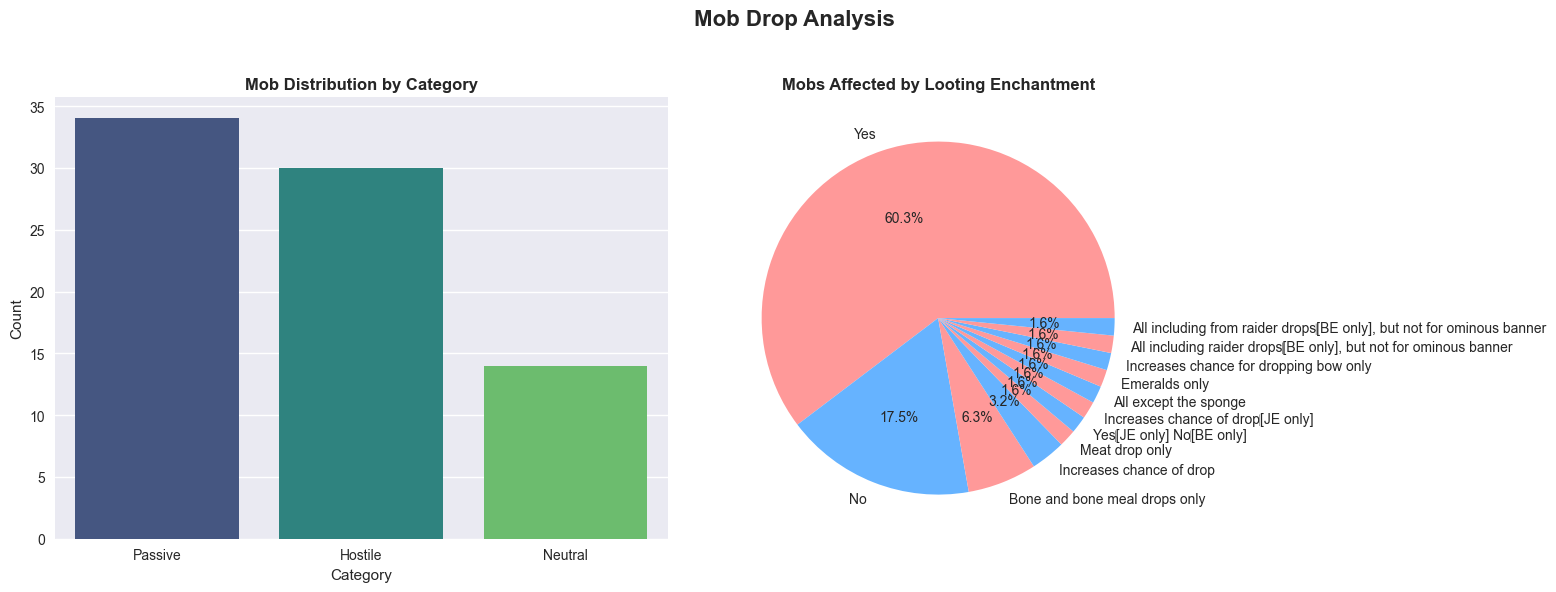

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/3229825156.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/3229825156.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["No Effect", "Has Effect"], y=status_effect_counts.values,


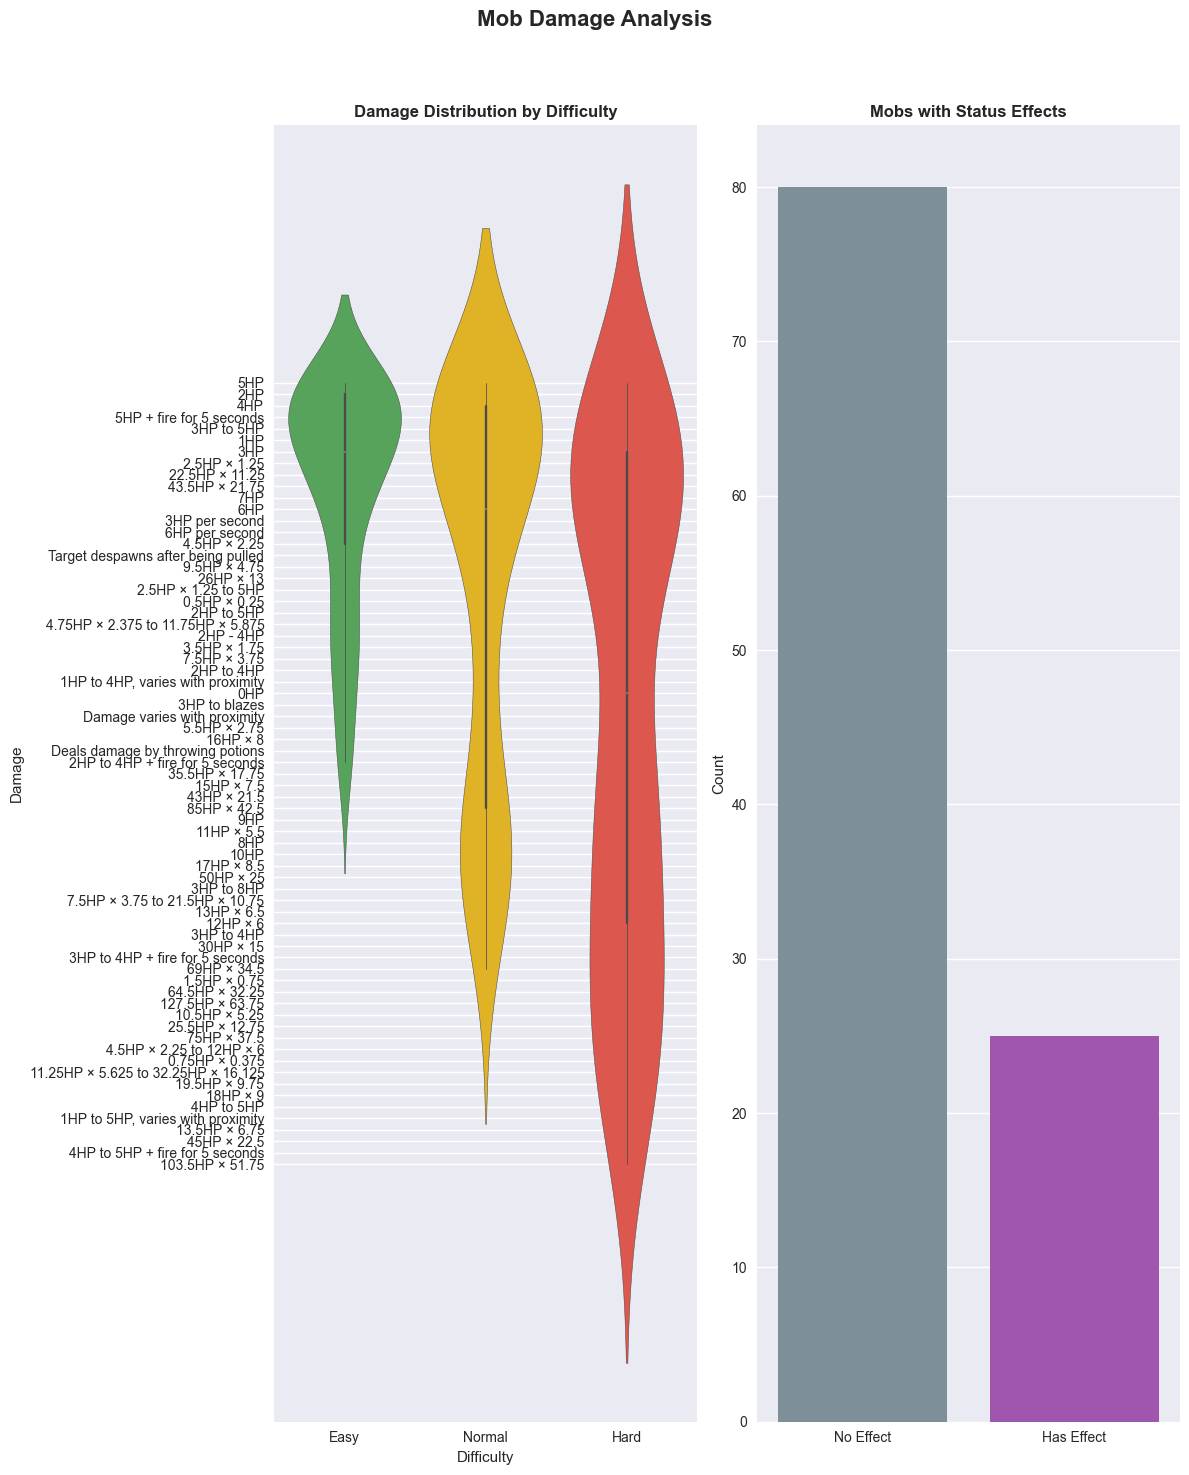

Skipping label for mob axolotl: invalid Difficulty Hard or Exp
Skipping label for mob bee: invalid Difficulty Hard or Exp
Skipping label for mob cat: invalid Difficulty Hard or Exp
Skipping label for mob dolphin: invalid Difficulty Hard or Exp
Skipping label for mob drowned: invalid Difficulty Hard or Exp
Skipping label for mob enderman: invalid Difficulty Hard or Exp
Skipping label for mob endermite: invalid Difficulty Hard or Exp
Skipping label for mob fox: invalid Difficulty Hard or Exp
Skipping label for mob frog: invalid Difficulty Hard or Exp
Skipping label for mob giant‌: invalid Difficulty Hard or Exp
Skipping label for mob goat: invalid Difficulty Hard or Exp
Skipping label for mob iron golem: invalid Difficulty Hard or Exp
Skipping label for mob ocelot: invalid Difficulty Hard or Exp
Skipping label for mob panda: invalid Difficulty Hard or Exp
Skipping label for mob polar bear: invalid Difficulty Hard or Exp
Skipping label for mob silverfish: invalid Difficulty Hard or Exp
Sk

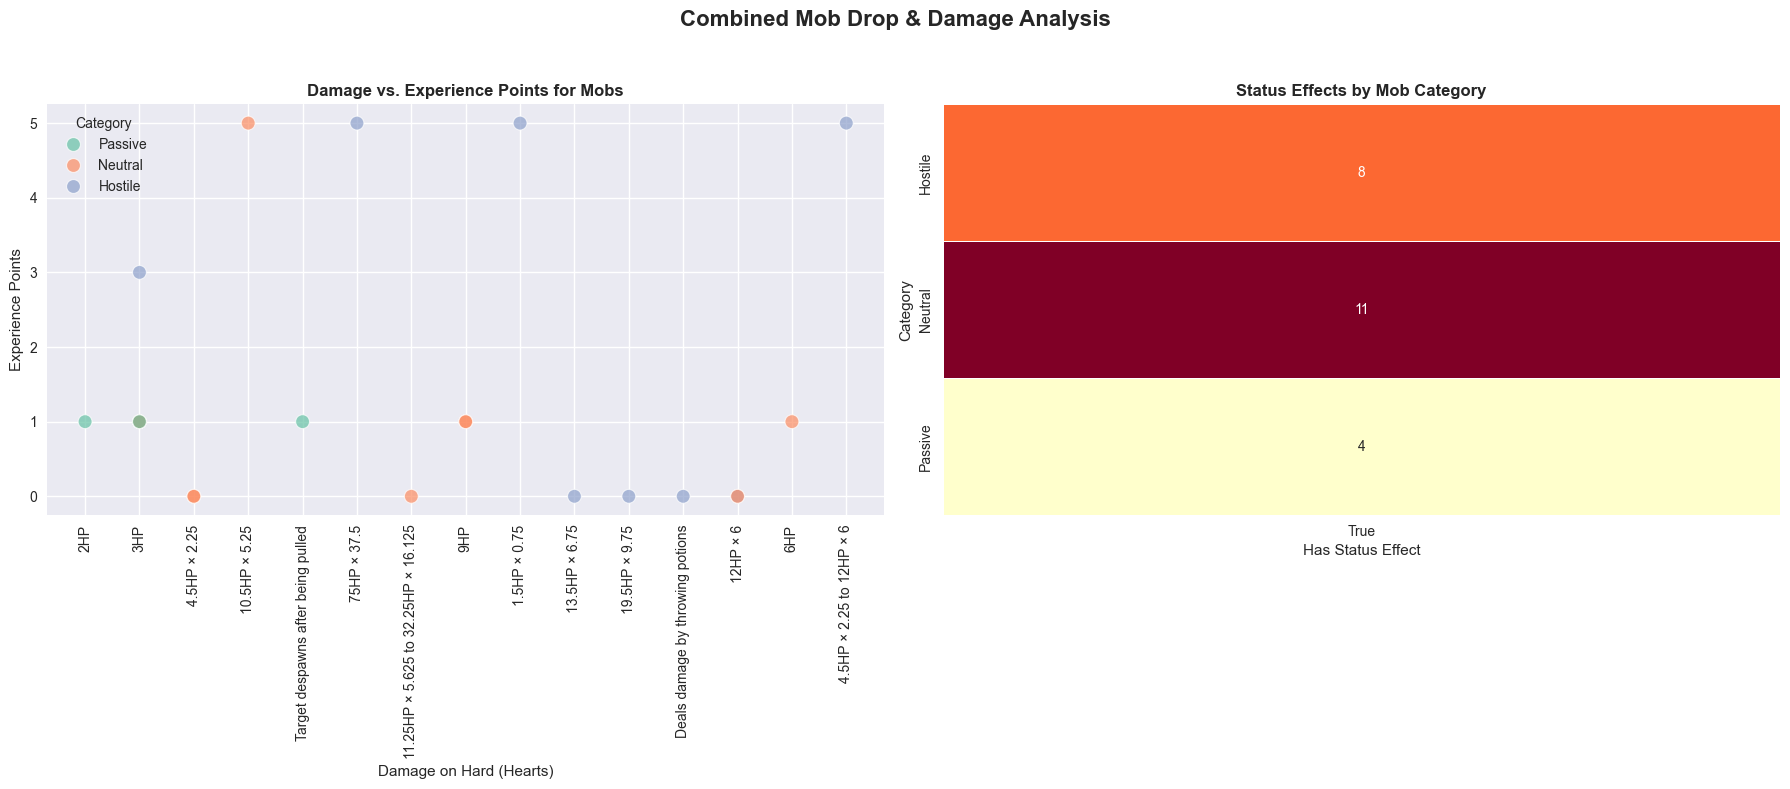

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/3229825156.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indices], y=features, palette="viridis", ax=ax1)
/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_64729/3229825156.py:283: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_series.index, y=coef_series.values, palette=colors, ax=ax3)


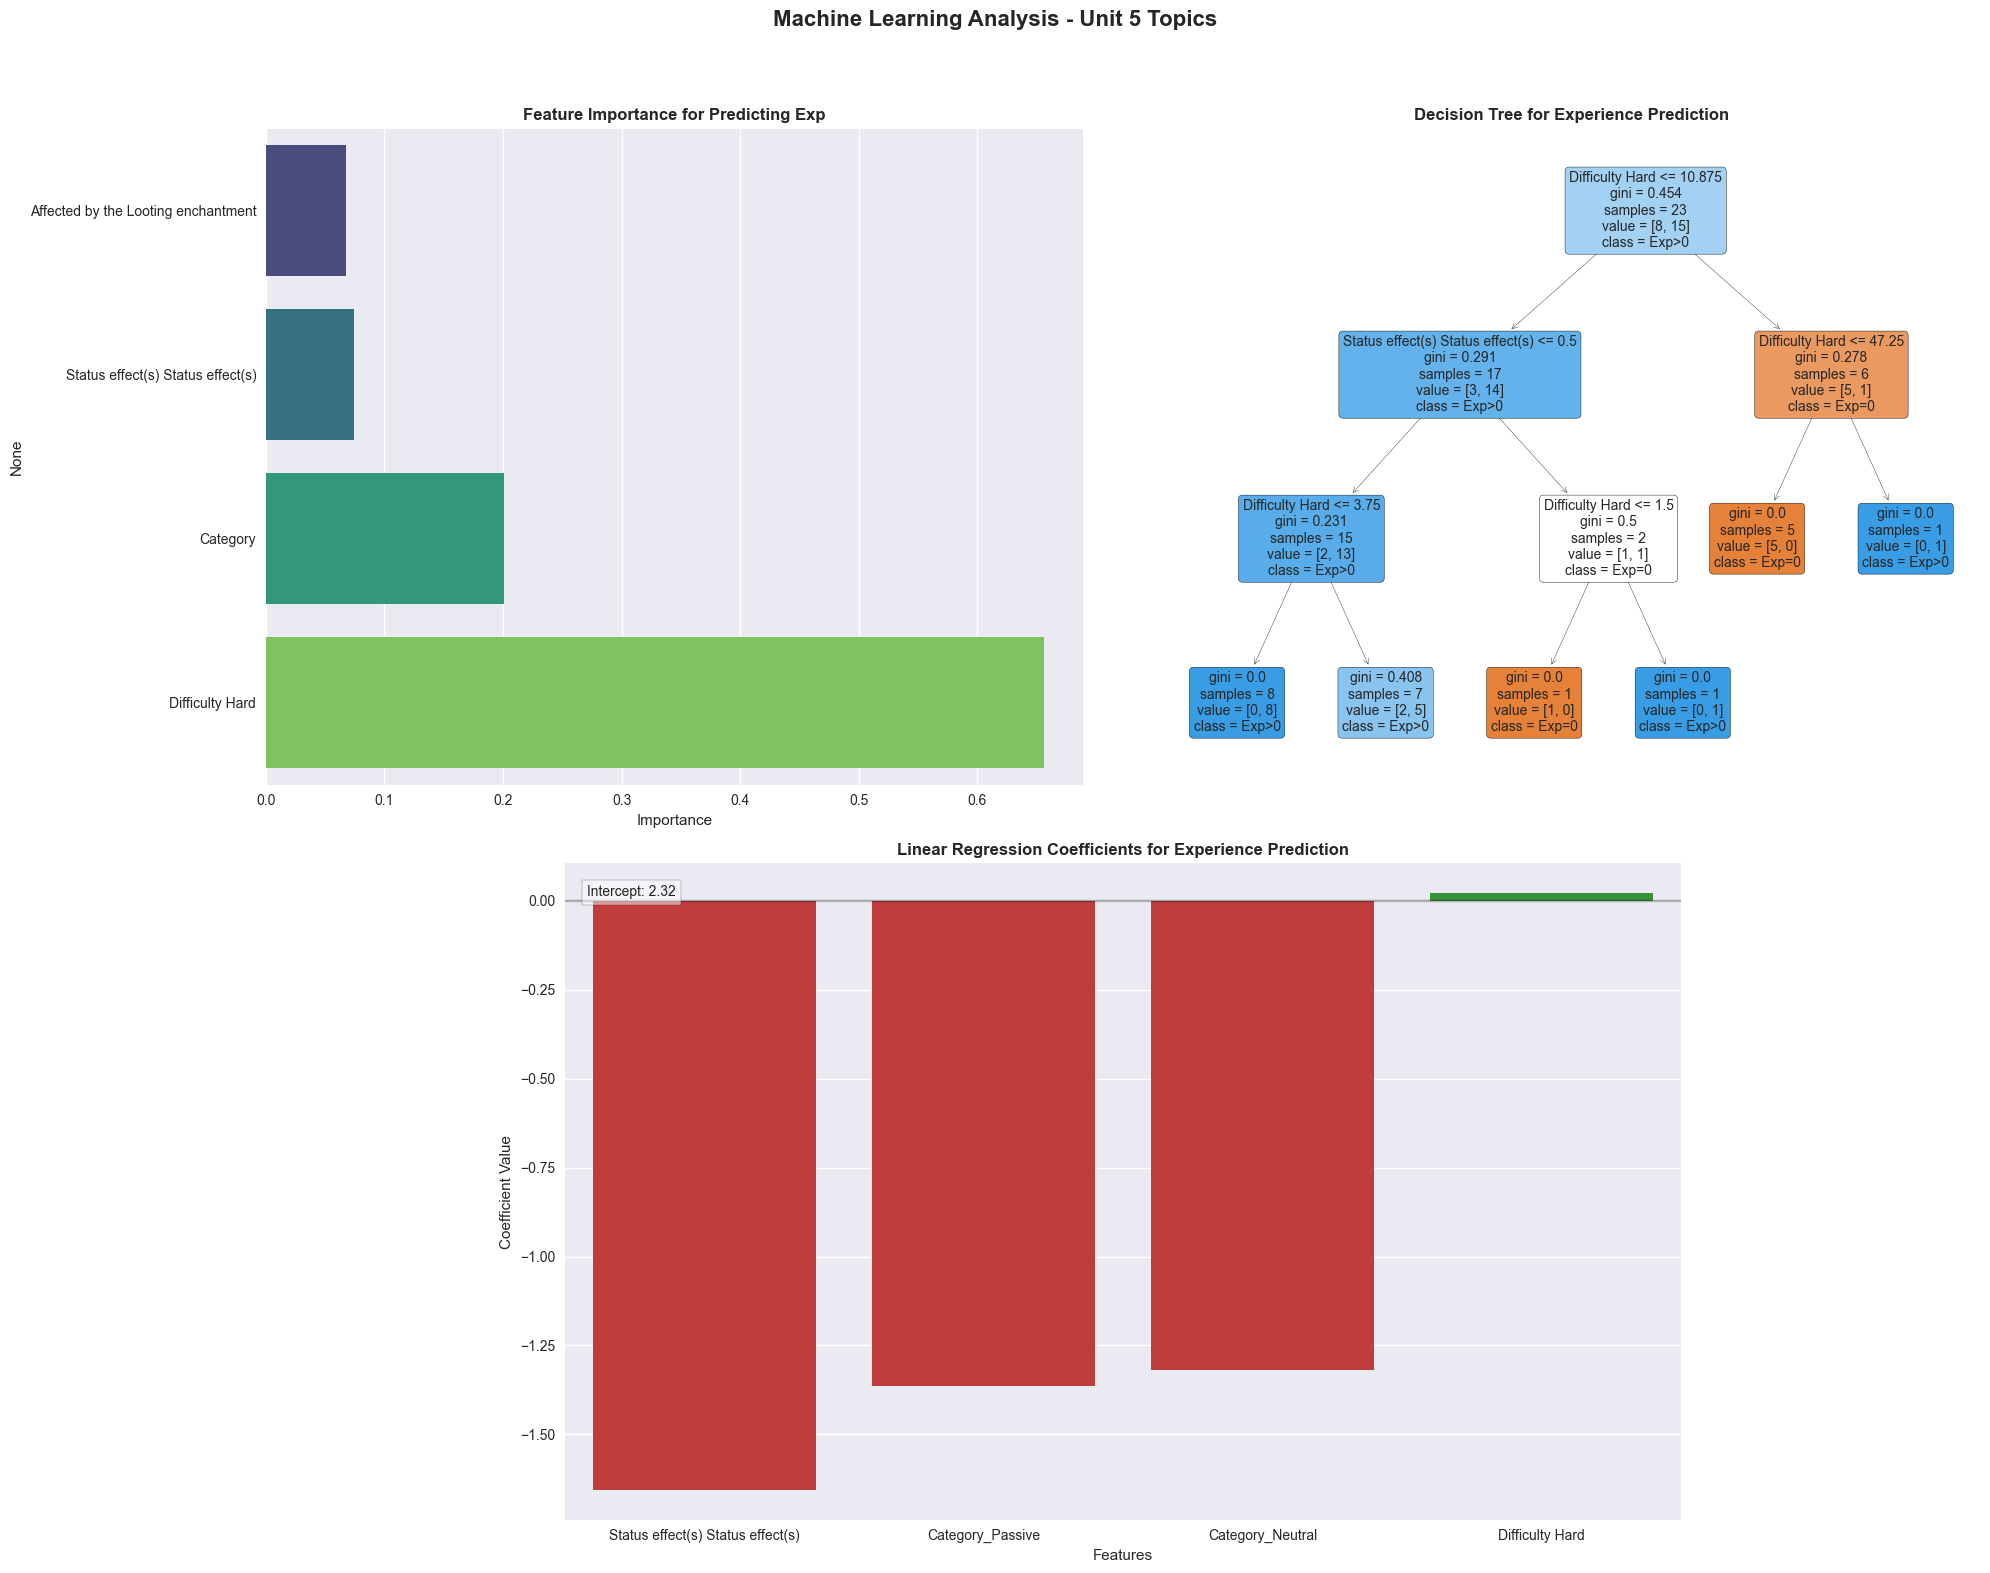

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

def load_data():
    """Load and preprocess all data files"""
    # Load CSVs
    passive_df = pd.read_csv("passive_mobs.csv")
    neutral_df = pd.read_csv("neutral_mobs.csv")
    hostile_df = pd.read_csv("hostile_mobs.csv")
    damage_df = pd.read_csv("mob_damage.csv")
    
    # Add category columns
    passive_df["Category"] = "Passive"
    neutral_df["Category"] = "Neutral"
    hostile_df["Category"] = "Hostile"
    
    # Combine all mob drop data
    drops_df = pd.concat([passive_df, neutral_df, hostile_df], ignore_index=True)
    
    # Standardize mob names
    drops_df["Mob"] = drops_df["Mob"].str.strip().str.lower()
    damage_df["Mob Mob"] = damage_df["Mob Mob"].str.strip().str.lower()
    
    return drops_df, damage_df

def merge_datasets(drops_df, damage_df):
    """Merge the datasets in different ways as needed for analysis"""
    # Merge with selected columns for analysis
    combined_df = pd.merge(
        drops_df, 
        damage_df.rename(columns={
            "Mob Mob": "Mob",
            "Difficulty Normal": "Damage",
            "Status effect(s) Status effect(s)": "Status_Effect"
        }),
        on="Mob", 
        how="inner"
    )
    
    # More detailed merge for machine learning
    merged_df = pd.merge(
        damage_df[["Mob Mob", "Difficulty Hard", "Status effect(s) Status effect(s)"]],
        drops_df[["Mob", "Exp", "Category", "Affected by the Looting enchantment"]],
        left_on="Mob Mob",
        right_on="Mob",
        how="inner"
    )
    
    # Clean Experience column
    merged_df["Exp"] = merged_df["Exp"].apply(clean_exp)
    
    return combined_df, merged_df

def clean_exp(x):
    """Clean Experience values"""
    if pd.isna(x) or str(x).strip() in ["0", "", "None"]:
        return 0.0
    try:
        # Split on en dash or hyphen
        return float(str(x).split("–")[0].split("-")[0])
    except:
        return 0.0

def clean_difficulty(value):
    """Clean difficulty values for analysis"""
    if isinstance(value, str):
        # Remove HP if present
        value = value.replace("HP", "")
        # Handle multiplication cases (take first value)
        if "×" in value:
            return float(value.split("×")[0].strip())
        # Handle other cases
        try:
            return float(value)
        except:
            return 0.0  # Default value if conversion fails
    return float(value)

def plot_mob_drops(drops_df):
    """Group 1: Mob Drop Analysis (graphs 1 & 2)"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle("Mob Drop Analysis", fontsize=16, fontweight="bold")
    
    # Graph 1: Category Distribution
    category_counts = drops_df["Category"].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", ax=ax1)
    ax1.set_title("Mob Distribution by Category", fontweight="bold")
    ax1.set_xlabel("Category")
    ax1.set_ylabel("Count")
    
    # Graph 2: Looting Enchantment Pie Chart
    looting_counts = drops_df["Affected by the Looting enchantment"].value_counts()
    ax2.pie(looting_counts, labels=looting_counts.index, 
            autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
    ax2.set_title("Mobs Affected by Looting Enchantment", fontweight="bold")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_mob_damage(damage_df):
    """Group 2: Mob Damage Analysis (graphs 3 & 4)"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 15))
    plt.suptitle("Mob Damage Analysis", fontsize=16, fontweight="bold")
    
    # Graph 3: Damage Distribution
    # Reshape damage_df for the violin plot
    melted_damage_df = pd.melt(
        damage_df,
        id_vars=["Mob Mob"],
        value_vars=["Difficulty Easy", "Difficulty Normal", "Difficulty Hard"],
        var_name="Difficulty",
        value_name="Damage"
    )
    
    # Clean up Difficulty column 
    melted_damage_df["Difficulty"] = melted_damage_df["Difficulty"].replace({
        "Difficulty Easy": "Easy",
        "Difficulty Normal": "Normal",
        "Difficulty Hard": "Hard"
    })
    
    sns.violinplot(
        data=melted_damage_df,
        x="Difficulty",
        y="Damage",
        palette=["#4CAF50", "#FFC107", "#F44336"],
        order=["Easy", "Normal", "Hard"],
        ax=ax1
    )
    ax1.set_title("Damage Distribution by Difficulty", fontweight="bold")
    ax1.set_xlabel("Difficulty")
    ax1.set_ylabel("Damage")
    
    # Graph 4: Status Effects
    status_effect_counts = (damage_df["Status effect(s) Status effect(s)"] != "No").value_counts()
    status_effect_counts = status_effect_counts.reindex([False, True], fill_value=0)
    
    sns.barplot(x=["No Effect", "Has Effect"], y=status_effect_counts.values, 
                palette=["#78909C", "#AB47BC"], ax=ax2)
    ax2.set_title("Mobs with Status Effects", fontweight="bold")
    ax2.set_ylabel("Count")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_mixed_analysis(merged_df, combined_df):
    """Group 3: Mixed Analysis of Mob Drops & Damage (graphs 5 & 6)"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    plt.suptitle("Combined Mob Drop & Damage Analysis", fontsize=16, fontweight="bold")
    
    # Graph 5: Damage vs Experience Points
    if len(merged_df) > 0:
        sns.scatterplot(
            x="Difficulty Hard",
            y="Exp",
            hue="Category",
            palette="Set2",
            data=merged_df,
            s=100,
            alpha=0.7,
            ax=ax1
        )
        
        # Add text labels for mobs
        for i, row in merged_df.iterrows():
            try:
                x = float(row["Difficulty Hard"]) + 0.5
                y = float(row["Exp"])
                ax1.text(x, y, row["Mob"], fontsize=8)
            except (ValueError, TypeError):
                print(f"Skipping label for mob {row['Mob']}: invalid Difficulty Hard or Exp")
                
        ax1.set_title("Damage vs. Experience Points for Mobs", fontweight="bold")
        ax1.set_xlabel("Damage on Hard (Hearts)")
        ax1.set_ylabel("Experience Points")
        ax1.tick_params(axis='x', rotation=90)
        
    else:
        ax1.text(0.5, 0.5, "No data available", ha='center', va='center')
    
    # Graph 6: Category Status Heatmap
    heatmap_data = pd.crosstab(combined_df["Category"], 
                              combined_df["Status_Effect"].notna())
    
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", 
                linewidths=0.5, cbar=False, ax=ax2)
    ax2.set_title("Status Effects by Mob Category", fontweight="bold")
    ax2.set_xlabel("Has Status Effect")
    ax2.set_ylabel("Category")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def prepare_ml_features(merged_df):
    """Prepare features for machine learning models"""
    X = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)", "Affected by the Looting enchantment"]]
    X = X.copy()  # Avoid SettingWithCopyWarning
    
    # Clean numeric features
    X["Difficulty Hard"] = X["Difficulty Hard"].apply(clean_difficulty)
    
    # Encode categorical features
    X["Category"] = LabelEncoder().fit_transform(X["Category"])
    X["Status effect(s) Status effect(s)"] = (X["Status effect(s) Status effect(s)"] != "No").astype(int)
    X["Affected by the Looting enchantment"] = X["Affected by the Looting enchantment"].map({
        "Yes": 1, "No": 0, "Unknown": 0
    }).fillna(0)
    
    y = merged_df["Exp"]
    
    return X, y

def plot_ml_analysis(merged_df):
    """Group 4: Machine Learning Analysis (graphs 7, 8 & 9)"""
    if len(merged_df) == 0:
        print("Skipping ML analysis: merged_df is empty.")
        return
        
    fig = plt.figure(figsize=(20, 16))
    plt.suptitle("Machine Learning Analysis - Unit 5 Topics", fontsize=16, fontweight="bold")
    
    # Set up grid for different sized plots
    gs = fig.add_gridspec(2, 6)
    ax1 = fig.add_subplot(gs[0, :3])  # Top left - Random Forest
    ax2 = fig.add_subplot(gs[0, 3:])  # Top right - Decision Tree
    ax3 = fig.add_subplot(gs[1, 1:5])  # Bottom - Linear Regression
    
    # Graph 7: Random Forest Feature Importance
    X, y = prepare_ml_features(merged_df)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Sort features by importance
    importance = rf.feature_importances_
    indices = np.argsort(importance)
    features = X.columns[indices]
    
    # Plot horizontally for better readability
    sns.barplot(x=importance[indices], y=features, palette="viridis", ax=ax1)
    ax1.set_title("Feature Importance for Predicting Exp", fontweight="bold")
    ax1.set_xlabel("Importance")
    
    # Graph 8: Decision Tree
    X_dt = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)"]]
    X_dt = X_dt.copy()
    
    X_dt["Difficulty Hard"] = X_dt["Difficulty Hard"].apply(clean_difficulty)
    X_dt["Category"] = LabelEncoder().fit_transform(X_dt["Category"])
    X_dt["Status effect(s) Status effect(s)"] = (X_dt["Status effect(s) Status effect(s)"] != "No").astype(int)
    
    y_dt = (merged_df["Exp"] > 0).astype(int)
    
    dt = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt.fit(X_dt, y_dt)
    
    plot_tree(dt, feature_names=X_dt.columns, class_names=["Exp=0", "Exp>0"], 
              filled=True, rounded=True, fontsize=10, ax=ax2)
    ax2.set_title("Decision Tree for Experience Prediction", fontweight="bold")
    
    # Graph 9: Linear Regression Coefficients
    X_lr = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)"]]
    X_lr = pd.get_dummies(X_lr, columns=["Category"], drop_first=True)
    X_lr["Status effect(s) Status effect(s)"] = (X_lr["Status effect(s) Status effect(s)"] != "No").astype(int)
    X_lr["Difficulty Hard"] = X_lr["Difficulty Hard"].apply(clean_difficulty)
    
    y_lr = merged_df["Exp"]
    
    lr = LinearRegression()
    lr.fit(X_lr, y_lr)
    
    # Create coefficient plot
    coef_dict = dict(zip(X_lr.columns, lr.coef_))
    coef_series = pd.Series(coef_dict).sort_values()
    
    # Plot coefficients
    colors = ['#2ca02c' if x > 0 else '#d62728' for x in coef_series]
    sns.barplot(x=coef_series.index, y=coef_series.values, palette=colors, ax=ax3)
    ax3.set_title("Linear Regression Coefficients for Experience Prediction", fontweight="bold")
    ax3.set_xlabel("Features")
    ax3.set_ylabel("Coefficient Value")
    ax3.tick_params(axis='x', rotation=0)
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Add intercept value as text
    ax3.text(0.02, 0.95, f"Intercept: {lr.intercept_:.2f}", transform=ax3.transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def main():
    # Load data
    drops_df, damage_df = load_data()
    
    # Merge datasets
    combined_df, merged_df = merge_datasets(drops_df, damage_df)
    
    # Create the 4 grouped visualizations
    plot_mob_drops(drops_df)                  # Group 1: Graphs 1 & 2
    plot_mob_damage(damage_df)                # Group 2: Graphs 3 & 4
    plot_mixed_analysis(merged_df, combined_df) # Group 3: Graphs 5 & 6
    plot_ml_analysis(merged_df)               # Group 4: Graphs 7, 8 & 9

if __name__ == "__main__":
    main()

#Claude AI assisted in refining and formatting the code


• Mob distribution by category (Graph 1)
The histogram displays the distribution of mobs by category—Passive (35), Hostile (30), and Neutral (15). The most prevalent mobs are passive ones, which is probably due to their function in obtaining resources (e.g., chickens for feathers, and cows for leather). As we'll see in subsequent graphs, hostile mobs are a bigger threat. Finally, neutral creatures such as Endermen are the least prevalent (e.g., Endermen require specialized biomes or the End dimension).
• Mobs affected by looting enchantment (Graph 2)
Graph 2 shows that 60.3% of mobs are not impacted by looting. However 17.5% are, with less percentages experiencing particular boosts (e.g., 1.6% for emeralds exclusively, 6.3% for bone and bone meal). This suggests that looting is a selective advantage, as it affects the value of some mobs (such as zombies) while benefiting others (such as passive creatures dropping fixed items).

• Damage distribution by difficulty (Graph 3)
Damage distribution across difficulty levels is displayed in the violin plot. Damage peaks between 1 and 2 HP on Easy, moves between 2 and 3 HP on Normal, and varies between 3 and 5 HP on Hard, with outliers up to 21.5 HP (bosses like the Wither). Specific damage levels are described in the left text: Hoglins deal 11.25 HP × 5 (up to 56.25 HP), Piglins deal 4.75 HP to 11 HP, and Skeletons deal 5 HP + fire damage. This demonstrates that battle danger is greatly increased by difficulty scaling.
• Mobs with status effects (Graph 4)
According to the second histogram, the majority of mobs (about 70) do not apply status effects. While a lesser percentage (around 25) do, for example the Cave Spiders (Poison) and Wither Skeletons (Wither effect). This disparity emphasises status effects are a specific characteristic that is frequently associated with hostile mobs.

• Damage vs. EXP for mobs (Graph 5)
Damage (on Hard difficulty) and EXP are compared across mob categories in the scatter plot. Damage varies from 2 HP to 12 HP × 6 (multi-hit attacks, such as Wither's explosives, can theoretically cause up to 72 HP). The majority of mobs deal 1 HP to 4 HP, but hostile mobs (blue) tend to deal low EXP (0 to 2) and higher damage (3 HP to 5 HP). Neutral monsters (orange) vary greatly; Endermen, for instance, deal 5 HP and drop 5 EXP, making them high-risk, high-reward targets. Passive mobs (green) deal 0 HP to 1 HP and generate 1 to 3 EXP. Thus, I found out that EXP doesn't increase linearly with damage, indicating that some mobs are more efficient for EXP farming in spite of the danger.
• Hostile mobs dominate status effects (Graph 6)
According to the stacked bar chart, hostile mobs account for the majority of status-effect mobs (8 out of 23), followed by neutral mobs (11) and passive mobs (4). In addition to their raw damage, hostile mobs are the most hazardous due to damage effects like Poison or Wither, which makes battles more strategic

• Feature importance for predicting EXP (Graph 7)
I have used random forest to rank feature importance to handle my mix of numeric and categorical features (not casual forest since there is no treatment variable) The best predictor of EXP, according to the feature importance table, is Difficulty Hard (0.6 important), which is followed by Category (0.3), Status Effects (0.2), and Affected by Looting Enchantment (0.1). This implies that a mob's type (e.g., hostile) has a big impact on its EXP yield. Thus tougher challenges = riskier battles = larger EXP rewards.
• Decision tree for high EXP Mobs (Graph 8)
Whether a mob produces EXP > 0 is predicted by the decision tree. Difficulty Hard ≤ 10.875 causes the root node to split, while Status Effects and Difficulty Hard limits cause further splits. For instance, the mob is likely to produce EXP > 0 (15 samples) if Difficulty Hard ≤ 47.25 and there are no status effects. This tree confirmes that high EXP mobs are often tied to higher difficulty settings and lack of status effects, possibly because status-effect mobs are balanced with lower EXP, compared to their danger.
• Linear regression coefficients (Graph 9)
The regression model also implies that while status effects and being Neutral or Passive lower EXP, higher difficulty increases it.

Overview and tips for new Minecraft players:
Hierarchy of mobs: Despite dealing great damage, Endermen are particularly valuable because of their 5 EXP and rare Ender Pearl drops, which are required for teleportation and making Eyes of Ender. Zombies, while common, drop low-value flesh but benefit from Looting, making them a steady but less rewarding farm. Bosses like the Wither yield high EXP and rare drops (Nether Stars) but are inefficient due to their high damage (up to 72HP) 
Inefficiency of farming: Farming Wither Skeletons is inefficient due to their low drop rate (~2.5%) and dangerous Wither effect, as seen in the status effects distribution.


<span style="font-size:25px;"><b>Limitations:</b></span>
• Data and sample size: Not all mobs or updates were included in my analysis, depicting only the recent mods. Rare variations like the Wither Storm (from mods) are not included in my dataset of 54 mobs. Statistical significance is reduced with only 54 data sets. I could have used an outer join and input missing values (e.g., 0 for damage and EXP) to preserve all mobs but I thought this may understate the value of mobs missing from mob_drops.csv, particularly Hostile variants.
• Simplifications: Player equipment (such as armour lowering damage) and biome-specific spawning (such as husks in deserts) were not taken into consideration. This impacts the reality  and applicability of my findings to the farming in the actual game play.
Despite these, the analysis shows core trends in Minecraft’s mob information, providing some insights for players.


<span style="font-size:25px;"><b>Applications:</b></span>

1.	Using mob statistics to optimize your gameplay:
The Mob screen in the Statistics menu of Minecraft keeps track of the number of times you've killed each kind of mob and the number of times they've killed you (Minecraft Wiki, 2024). By combining this in-game data with my analysis, players can choose more wisely which mobs to farm, battle, or avoid. For example, check the Mob screen for your Enderman kill count. You're farming effectively if you have a lot of kills and few deaths. Otherwise, look for different biomes where Endermen often spawn. Similarly, examine the number of Wither Skeletons killed on the Mob screen. You are sacrificing too much danger for too little gain if the mortality-to-kill rate is high. So change to more secure options. Or, find out which mobs killing you the most. Prioritise defensive tactics by comparing to status effect graph with high-death mobs. Another piece of advice is to set your game to Hard difficulty (Graph 7's prediction) for improved EXP returns.

2.	Applying git version control to multiplayer gamemode:
This is hypothetical, but Git could be adapted for Minecraft multiplayer to optimize their gameplay based on my mob analysis. Let’s imagine a group of three players on a multiplayer server. They could create a Git repository to store and manage their gameplay. The repository could include: CSV files (mob_screen.csv) for each player, containing their Mob screen statistics, my python scripts (minecraft_mob_analysis.py and mob_screen_analysis.py), and text files documenting group strategies. Let’s say that after 1 week of playing, player A has 50 Enderman kills, 2 deaths; Player B has 20 Wither Skeleton kills, 15 deaths; Player C farms Zombies with Looting III. The group shows Endermen have the highest kill-to-death ratio (25:1), confirming my finding that they’re efficient. If wither Skeleton deaths are high, it requires a shift in farming. Player C’s Zombie drops are high, validating Graph 2’s Looting benefit. 
Furthermore, they could make a group dataset, calculating characteristics like average kill-to-death ratios per mob across players and visualizing the data. Players could commit these outputs to the repository, using Git’s history to track improvements over time. Committing enderman_farm.md; testing strategies and merging if deaths drop; there are many choices (A causal ML analysis like ‘Does looting III cause higher drop rates?’, OR expanding the relational database like adding biome-spawn tables via SQL joins, could also be fun). Through this refining, the group’s EXP gains could increase more efficiently and reduce deaths, all tracked in Git’s history. It's possible that the experiment could uncover unexpected patterns, such as passive mobs causing unexpected deaths like falling while chasing chickens!).


Conclusion:
Working on this project was both enjoyable and enlightening. This time I prioritized more on smaller, full data and more care on cleaning. The biggest takeaway was learning web scraping, which opened new possibilities for gathering data. I likewise detested using Excel to make graphs, but using coding to visualize the data was a lot less stressful method of revealing new perspective of the game mobs. 

This project demonstrated data science's creative potential in addition to its technical skills.   I discovered unknown insights by allowing my curiosity to drive my investigation, such as the Endermen's unexpected   superiority over Wither, which seemed more deadly and worth farming. Exploring trends in loot, damage, and status effects, clearing up discrepancies, and scraping mob numbers was a painful but fun method of rediscovering the value hierarchy of Minecraft mobs.

In the end, I hope my effort reflected the fundamental idea of Minecraft: curiosity is the first step towards meaningful creations. Whether writing code or placing blocks, the joy lies in the process.

Want to try this analysis yourself? Check out my GitHub repo (https://github.com/JINJINJINCODE/minecraft-mob-analysis/tree/main) and try the code yourself!

Word count: 1956


Citations:
Minecraft Wiki (2024) Statistics. Available at: https://minecraft.fandom.com/wiki/Statistics

Anthropic (2025) Claude AI. Available at: https://claude.ai 

DeepSeek (2025) DeepSeek Chat. Available at: https://chat.deepseek.com 

OpenAI (2025) ChatGPT (version GPT-4). Available at: https://chat.openai.com 


![GENAI declaration.png](<attachment:GENAI declaration.png>)
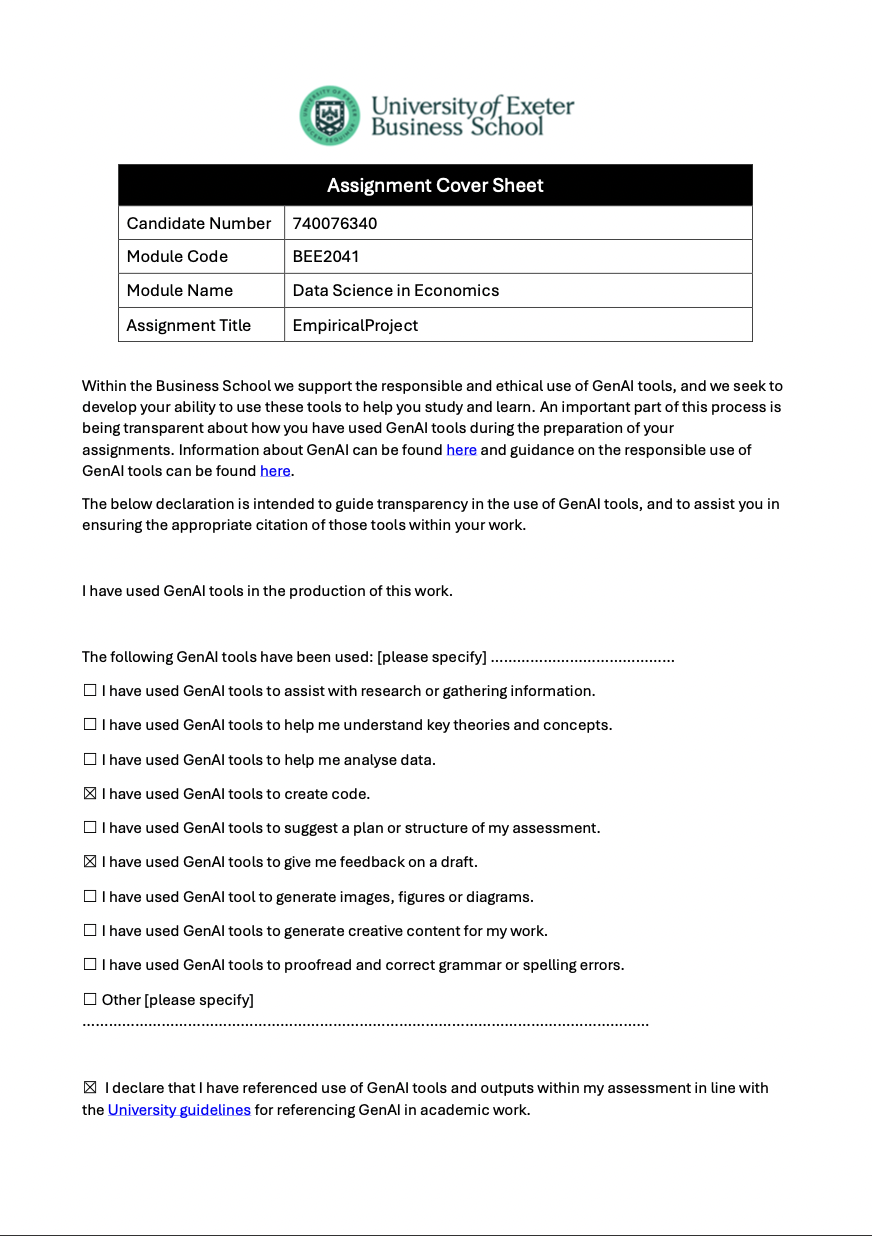